# ANÁLISIS INICIAL DE FICHEROS Y PREPARACIÓN DEL CASO

Los datos se obtienen del siguiente enlace: http://insideairbnb.com/get-the-data.html

Concretamente usaremos la Ciudad Autonoma de Buenos Aires.

## SETUP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Automcompletar rápido
%config IPCompleter.greedy=True

C:\Users\dt_i01626\AppData\Local\Temp\ipykernel_11456\4025988318.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## ENTENDER LOS FICHEROS

En la web podemos ver la descripción de las tablas:

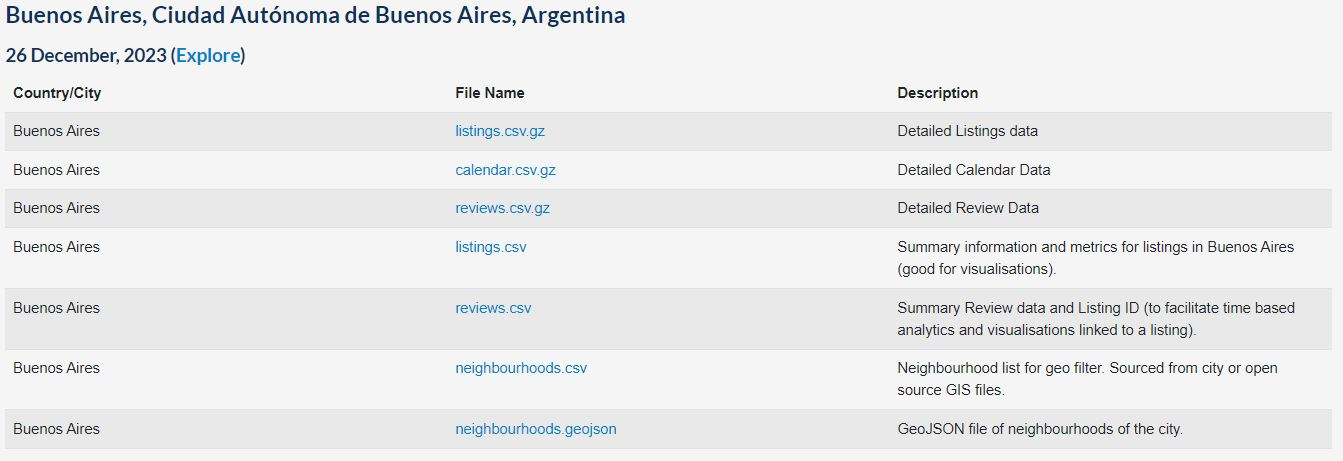

In [2]:
from IPython import display
display.Image("../99_Media/airbnb_caba.jpg")

Vamos a cargar una por una, entenderlas y tomar decisión de si la usamos o no.

### Cargamos y entendemos listings agregados

In [3]:
listings = pd.read_csv('../Datos/listings.csv')

In [4]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,42762,Candela,NaN,Palermo,-34.581840,-58.424150,Entire home/apt,96921.0,3,39,2023-11-30,0.28,1,298,6,NaN
1,14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,María,NaN,Palermo,-34.586170,-58.410360,Entire home/apt,32123.0,7,114,2023-11-30,0.82,8,161,12,NaN
2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,NaN,Nuñez,-34.538920,-58.465990,Private room,24230.0,29,0,NaN,NaN,1,0,0,NaN
3,16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,NaN,Monserrat,-34.614390,-58.376110,Entire home/apt,40303.0,2,45,2019-11-30,0.29,9,0,0,NaN
4,20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,NaN,Palermo,-34.581848,-58.441605,Entire home/apt,138876.0,2,303,2023-12-26,1.83,4,92,30,NaN


In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              33490 non-null  int64  
 1   name                            33490 non-null  object 
 2   host_id                         33490 non-null  int64  
 3   host_name                       33480 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   33490 non-null  object 
 6   latitude                        33490 non-null  float64
 7   longitude                       33490 non-null  float64
 8   room_type                       33490 non-null  object 
 9   price                           32508 non-null  float64
 10  minimum_nights                  33490 non-null  int64  
 11  number_of_reviews               33490 non-null  int64  
 12  last_review                     

### Cargamos y entendemos listings detalle

In [6]:
listings_det = pd.read_csv('../Datos/listings.csv.gz')

In [7]:
listings_det.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20231226203815,2023-12-29,city scrape,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,NaN,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,...,4.97,4.92,4.87,NaN,f,1,1,0,0,0.28
1,14222,https://www.airbnb.com/rooms/14222,20231226203815,2023-12-28,city scrape,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,NaN,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,...,4.89,4.87,4.75,NaN,f,8,8,0,0,0.82
2,15074,https://www.airbnb.com/rooms/15074,20231226203815,2023-12-29,previous scrape,Rental unit in Buenos Aires · 1 bedroom · 1 be...,NaN,NaN,https://a0.muscache.com/pictures/91166/c0fdcb4...,59338,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
3,16695,https://www.airbnb.com/rooms/16695,20231226203815,2023-12-28,city scrape,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,NaN,San Telmo is one of the best neighborhoods in ...,https://a0.muscache.com/pictures/619c33a9-0618...,64880,...,4.80,4.39,4.41,NaN,t,9,9,0,0,0.29
4,20062,https://www.airbnb.com/rooms/20062,20231226203815,2023-12-28,city scrape,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,NaN,NaN,https://a0.muscache.com/pictures/165679/2eb448...,75891,...,4.93,4.93,4.78,NaN,f,4,4,0,0,1.83


In [8]:
listings_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33490 entries, 0 to 33489
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            33490 non-null  int64  
 1   listing_url                                   33490 non-null  object 
 2   scrape_id                                     33490 non-null  int64  
 3   last_scraped                                  33490 non-null  object 
 4   source                                        33490 non-null  object 
 5   name                                          33490 non-null  object 
 6   description                                   0 non-null      float64
 7   neighborhood_overview                         18076 non-null  object 
 8   picture_url                                   33490 non-null  object 
 9   host_id                                       33490 non-null 

Conclusiones:

* Son los mismos registros pero el fichero de detalle tiene más columnas.
* Se podría unir mediante el campo id

### Cargamos y entendemos reviews agregado

In [9]:
reviews = pd.read_csv('../Datos/reviews.csv')

In [10]:
reviews.head()

,listing_id,date
0,11508,2012-07-02
1,11508,2012-12-26
2,11508,2013-01-05
3,11508,2013-07-28
4,11508,2013-12-22


In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755607 entries, 0 to 755606
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  755607 non-null  int64 
 1   date        755607 non-null  object
dtypes: int64(1), object(1)
memory usage: 11.5+ MB


### Cargamos y entendemos reviews detalle

In [12]:
reviews_det = pd.read_csv('../Datos/reviews.csv.gz')

In [13]:
reviews_det.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,11508,1615861,2012-07-02,877808,Charlie,Amazing place!\r<br/>\r<br/>Location: short wa...
1,11508,3157005,2012-12-26,656077,Shaily,Really enjoyed Candela's recommendations and q...
2,11508,3281011,2013-01-05,2835998,Michiel,Candela and her colleague were very attentive ...
3,11508,6050019,2013-07-28,4600436,Tara,"The apartment was in a beautiful, modern build..."
4,11508,9328455,2013-12-22,3130017,Simon,My stay at Candela's apartment was very enjoya...


In [14]:
reviews_det.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755607 entries, 0 to 755606
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     755607 non-null  int64 
 1   id             755607 non-null  int64 
 2   date           755607 non-null  object
 3   reviewer_id    755607 non-null  int64 
 4   reviewer_name  755607 non-null  object
 5   comments       755575 non-null  object
dtypes: int64(3), object(3)
memory usage: 34.6+ MB


Conclusiones:

* Son los mismos registros pero el fichero de detalle tiene más columnas.
* Esta info de las reseñas no nos aporta nada a nuestro objetivo, así que no usaremos estas tablas

### Cargamos y entendemos calendar

In [15]:
calendar = pd.read_csv('../Datos/calendar.csv.gz')

In [16]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,11508,2023-12-29,f,$65.00,NaN,3.0,1125.0
1,11508,2023-12-30,f,$65.00,NaN,3.0,1125.0
2,11508,2023-12-31,f,$65.00,NaN,3.0,1125.0
3,11508,2024-01-01,f,$65.00,NaN,3.0,1125.0
4,11508,2024-01-02,f,$65.00,NaN,3.0,1125.0


In [17]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12224859 entries, 0 to 12224858
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  float64
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 652.9+ MB


Conclusiones:

* Esta tabla se proyecta hacia el futuro, y parece contener la disponibilidad de reservas
* No es información que nos sirva a nuestros fines y por tanto no la usaremos

### Cargamos y entendemos neighbourhoods.csv

In [18]:
neigh = pd.read_csv('../Datos/neighbourhoods.csv')

In [19]:
neigh.head()

,neighbourhood_group,neighbourhood
0,NaN,Agronomia
1,NaN,Almagro
2,NaN,Balvanera
3,NaN,Barracas
4,NaN,Belgrano


In [20]:
neigh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        49 non-null     object 
dtypes: float64(1), object(1)
memory usage: 916.0+ bytes


Conclusiones:

* Es simplemente un maestro de vecindario y grupo de vecindario
* En principio no la usaremos, ya que tanto el vecindario como su grupo ya están incorporados en otras tablas

### Cargamos y entendemos neighbourhoods.geojson

In [21]:
neigh_geo = pd.read_json('../Datos/neighbourhoods.geojson')

In [24]:
neigh_geo.head(5)

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [25]:
neigh_geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      49 non-null     object
 1   features  49 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


### Conclusiones del análisis de ficheros

Tablas principales que usaremos:

* listings.csv
* listings.csv.gz

## CREACIÓN DE UNA BASE DE DATOS

In [26]:
import sqlalchemy as sa

con = sa.create_engine('sqlite:///../Datos/airbnb2.db')

Creamos las tablas y cargamos los datos

In [27]:
listings.to_sql('listings', con = con, if_exists = 'replace')
listings_det.to_sql('listings_det', con = con, if_exists = 'replace')

33490